In [13]:
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from astroNN.models import Galaxy10CNN

from keras import utils, models, layers, regularizers, constraints
import keras.utils
from tensorflow import keras


In [14]:
# Load the dataset
images, labels = galaxy10.load_data()

# Normalize pixel values
images = images.astype('float32') / 255.0

# Convert labels to one-hot encoding
labels = utils.to_categorical(labels, num_classes=10)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

C:\Users\ddaga\.astroNN\datasets\Galaxy10_DECals.h5 was found!


In [27]:
model = models.Sequential()
model.add(layers.Conv2D( 
    input_shape=(256, 256, 3), 
    kernel_initializer="he_normal",
    padding="same",
    filters=8,
    kernel_size=(3,3),
    kernel_regularizer=regularizers.l2(1e-4))
)
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(
    input_shape=(256, 256, 3), 
    kernel_initializer="he_normal",
    padding="same",
    filters=16,
    kernel_size=(3,3),
    kernel_regularizer=regularizers.l2(1e-4))
)
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(4,4)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
model.add(layers.Dense(
    units=256,
    kernel_regularizer=regularizers.l2(1e-4),
    kernel_initializer="he_normal"
))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(
    units=10,
    kernel_regularizer=regularizers.l2(1e-4),
    kernel_initializer="he_normal",
    kernel_constraint= constraints.MaxNorm(2)
))
model.add(layers.Activation('relu'))
model.add(layers.Dense(
    units=10,
    kernel_regularizer=regularizers.l2(1e-4),
    kernel_initializer="he_normal",
    kernel_constraint= constraints.MaxNorm(2)
))
model.add(layers.Activation('softmax'))

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 256, 256, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 256, 256, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,781,544 (64.02 MB)

 Trainable params: 16,781,544 (64.02 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 93s 207ms/step - accuracy: 0.1414 - loss: 2.5994 - val_accuracy: 0.1491 - val_loss: 2.2918
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 93s 209ms/step - accuracy: 0.1513 - loss: 2.2802 - val_accuracy: 0.1491 - val_loss: 2.2581
Epoch 3/5
284/444 ━━━━━━━━━━━━━━━━━━━━ 32s 202ms/step - accuracy: 0.1480 - loss: nan

: 

In [24]:
eval = model.evaluate(test_images, test_labels)
print(f'Galaxy10CNN Test Accuracy: {eval[1]}')


111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1473 - loss: nan
Galaxy10CNN Test Accuracy: 0.14909808337688446


111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step


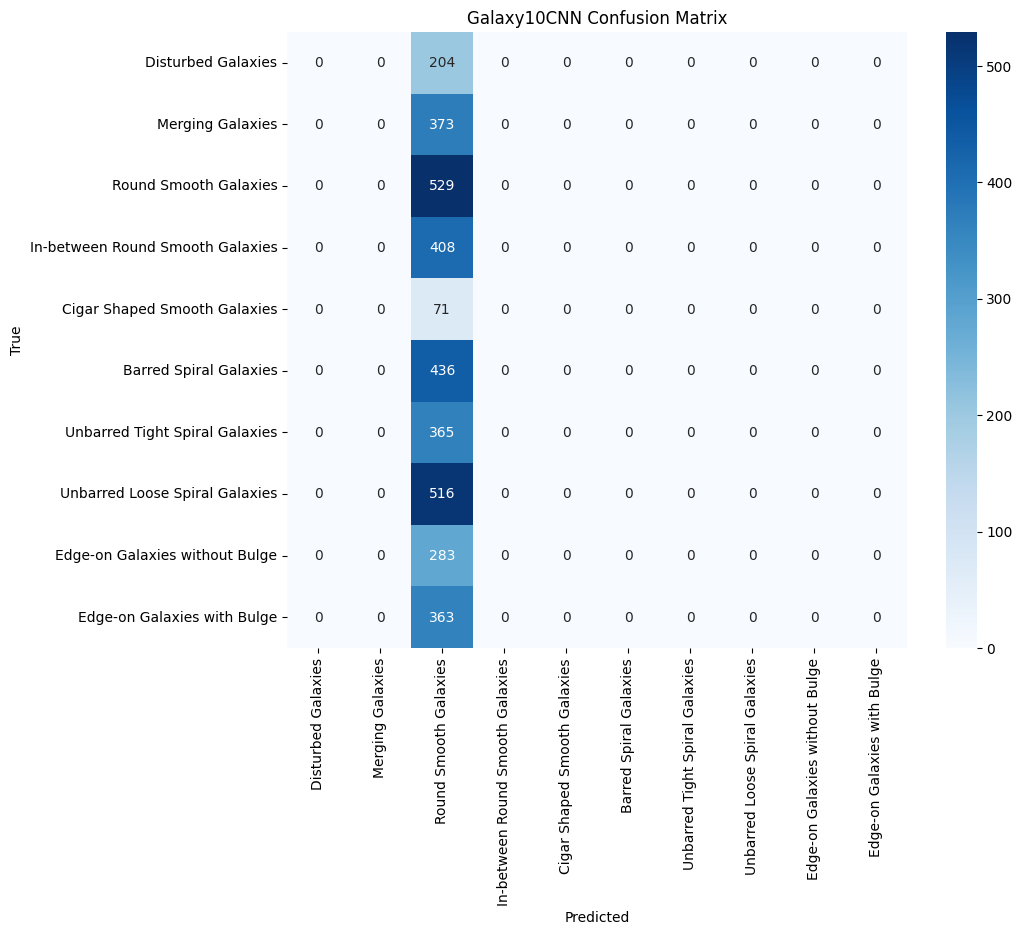

In [25]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

galaxy_classes = [
    "Disturbed Galaxies",
    "Merging Galaxies",
    "Round Smooth Galaxies",
    "In-between Round Smooth Galaxies",
    "Cigar Shaped Smooth Galaxies",
    "Barred Spiral Galaxies",
    "Unbarred Tight Spiral Galaxies",
    "Unbarred Loose Spiral Galaxies",
    "Edge-on Galaxies without Bulge",
    "Edge-on Galaxies with Bulge"
]

# Assuming test_labels are one-hot encoded, get the true classes
true_classes = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=galaxy_classes, yticklabels=galaxy_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Galaxy10CNN Confusion Matrix')
plt.show()